In [1]:
import pandas  as pd
import numpy as np

In [2]:
train=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/train.csv')
test=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/test.csv')

In [3]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [5]:
from sklearn.svm import SVC

In [21]:
# 创建支持向量机分类器
svm_classifier = SVC(kernel='linear',C=1,gamma=0.1,probability=True)  # 选择线性核函数

In [22]:
# 拟合模型
svm_classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear', probability=True)

In [23]:
from sklearn.metrics import classification_report

# 预测测试集
y_pred =svm_classifier.predict(X_test)

# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       282
           1       0.00      0.00      0.00        55

    accuracy                           0.84       337
   macro avg       0.42      0.50      0.46       337
weighted avg       0.70      0.84      0.76       337



C:\Users\19850\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19850\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19850\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


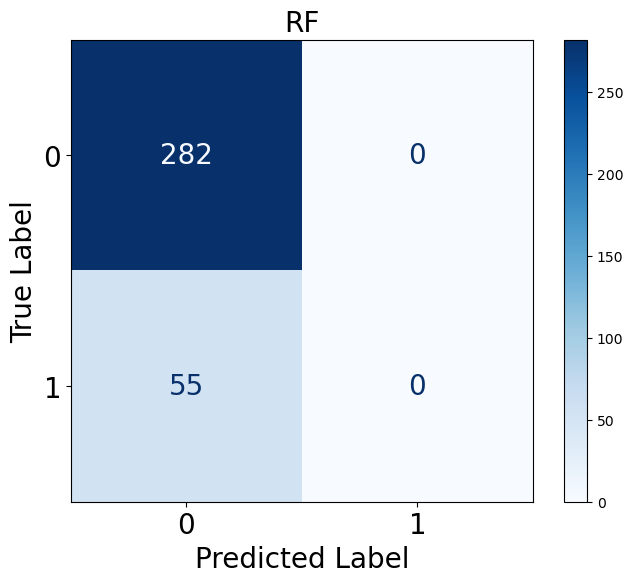

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# 计算混淆矩阵
confusion_matrix_model = confusion_matrix(y_test, y_pred)
# 使用 ConfusionMatrixDisplay 绘制混淆矩阵热力图
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model)
fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整图的大小
cm_display.plot(cmap='Blues', ax=ax, values_format='d')

# 修改数字字体大小
for texts in ax.texts:
    texts.set_fontsize(20)

# 设置图形标签和标题
plt.title('RF', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

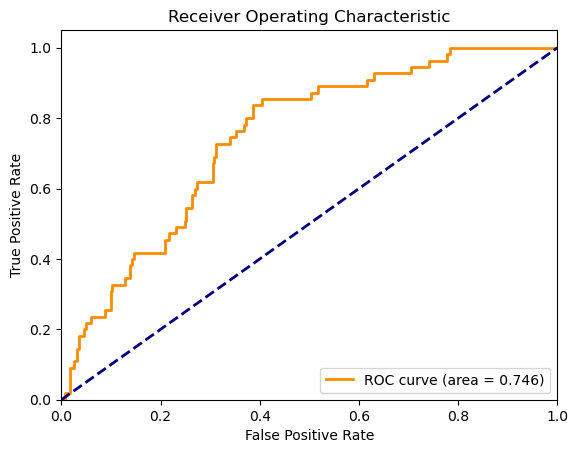

In [25]:
# 预测概率
y_score = svm_classifier.predict_proba(X_test)[:, 1]

# 计算 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()